In [431]:
using Random, Colors,  Plots, StatsBase, Printf, Formatting, DelimitedFiles

## Symbols
L - size of matrix <br>
K - monte carlo steps <br>
K0 - termalisation steps <br>
T - temperature <br>
J - constant of influence <br>
kB - boltzman constans
## Mathematical formulas
Average spin value:
$$m = \frac{1}{L^2}\sum_{i,j=1}^{L^2}S_{i,j}$$
Magnetisation:
$$\langle m\rangle = \frac{1}{l_{sym}}\sum_{j=1}^{l_{sym}}|m_j|$$
Magnetic susceptibility:
$$\chi = \frac{L^2}{k_B T}(\langle m^2\rangle -\langle m\rangle^2 )$$

#   Spin configuration for L = 10, L = 100 and T = 1, T=2.26, T=4

In [322]:
function spin_configuration(K,L,T,J=1,kB=1)
    plots=[]
    magnetisation = []
    
    init_random = rand([-1, 1], L, L) #generating initial state
    
    S=zeros(Int64, L+2, L+2)         #generating helpful matrix
    for i in 1:L
        for j in 1:L
            S[i+1,j+1] = init_random[i,j]
        end
    end
    
    for MCS in 1:K
        for step in 1:L^2         #draw a spin
            i = rand(2:L+1)
            j = rand(2:L+1)
            
            dE = 2*J*S[i,j]*(S[i-1,j]+S[i+1,j]+S[i,j-1]+S[i,j+1])  #delta energy
            
            if dE<=0                        #changing spin
                S[i,j] = -S[i,j]
            else
                x = rand()
                if x < exp(-dE/(kB*T))
                    S[i,j] = -S[i,j]
                end
            end
        end
        
        
        if MCS in [1,floor(K/5),2*floor(K/5),3*floor(K/5),K-1]   #colecting data for plots
            #println("ok")
            push!(plots,copy(S))
        end
            
#        if mod(MCS,10000) == 0               #checking Monte Carlo step
#            print(MCS)
#        end
            
        m = sum(copy(S))/L^2         #magnetisation
        append!(magnetisation,m)
    end
    return plots, magnetisation
end

spin_configuration (generic function with 3 methods)

In [20]:
K=10^6
L=10
conf_10_1,mag_10_1 = spin_configuration(K,L,1)
conf_10_2,mag_10_2 = spin_configuration(K,L,2.26)
conf_10_4,mag_10_4 = spin_configuration(K,L,4)

K=10^6
L=100
conf_100_1,mag_100_1 = spin_configuration(K,L,1)
conf_100_2,mag_100_2 = spin_configuration(K,L,2.26)
conf_100_4,mag_100_4 = spin_configuration(K,L,4)

ok
100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
600000610000620000630000640000650000660000670000680000690000700000710000720000730000740000750000760000770000780000790000800000810000820000830000840000850000860000870000880000890000900000910000920000930000940000950000960000970000980000990000ok
1000000ok
100002000030000400005000060000700008000090000100000110000120000130000140000150000160000170000180000190000ok
200000210000220000230000240000250000260000270000280000290000300000310000320000330000340000350000360000370000380000390000ok
400000410000420000430000440000450000460000470000480000490000500000510000520000530000540000550000560000570000580000590000ok
600000610000620000630000640000650000

(Any[[0 0 … 0 0; 0 -1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 -1 … -1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 -1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 1 … 1 0; 0 0 … 0 0]], Any[-0.0122, -0.014, 0.0044, 0.0126, 0.0054, 0.0122, -0.0088, -0.0114, -0.0066, -0.0042  …  -0.031, -0.028, -0.0336, -0.045, -0.0294, -0.0276, -0.047, -0.0516, -0.0348, -0.0158])

In [335]:
plots=[conf_10_1,conf_10_2,conf_10_4,conf_100_1,conf_100_2,conf_100_4]

6-element Vector{Vector{Any}}:
 [[0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0]]
 [[0 0 … 0 0; 0 -1 … -1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 -1 … 1 0; … ; 0 -1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 -1 … 1 0; 0 0 … 0 0]]
 [[0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 -1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … -1 0; … ; 0 -1 … -1 0; 0 0 … 0 0]]
 [[0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … -1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], [0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 

In [22]:
new_plots=[]                         #cleaning matrices
for conf in plots
    x=copy(length(conf))
    y=[]
    for i in 1:x
        a=conf[i]
        a = a[2:(end-1), 2:(end-1)]
        push!(y,a)
    end
    push!(new_plots,y)
end

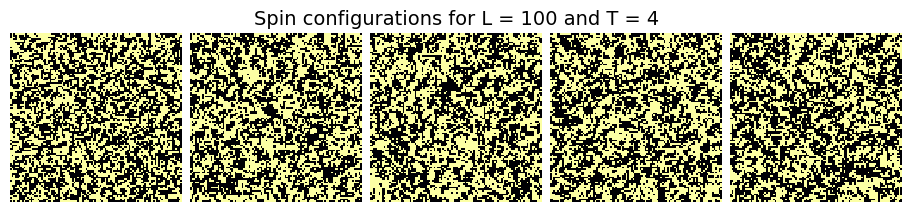

In [452]:
# generating spin configuration visualisation
for i in 1:6
    if i in [1,2,3] l = 10  else l = 100 end
    if i in [1,4] t = 1 elseif i in [2,5] t = 2.26 else t = 4 end
    tit="Spin configurations for L = $l and T = $t"
    p1=heatmap(new_plots[i][1],size=(200, 200),cbar=false,showaxis = false)
    p2=heatmap(new_plots[i][2],size=(200, 200),cbar=false,showaxis = false)
    p3=heatmap(new_plots[i][3],size=(200, 200),cbar=false,showaxis = false)
    p4=heatmap(new_plots[i][4],size=(200, 200),cbar=false,showaxis = false)
    p5=heatmap(new_plots[i][5],size=(200, 200),cbar=false,showaxis = false)
    p=[p1,p2,p3,p4,p5]
    plot(p..., layout = (1,5), colorbar = false, size = (900,200),titles=["" "" tit "" ""])
    png(string(l,"spina",trunc(Int, t)))
end

# Single trajectories for temperatures T = 1.7 for every L

In [408]:
T = 1.7                       #temperatures
L = [10, 50, 100]             #sizes
K = 10000                     #Monte Carlo steps;

In [409]:
trajectories=[]
for i in 1:10
    for l in L
        push!(trajectories,spin_configuration(K,l,T)[2])
    end
end 

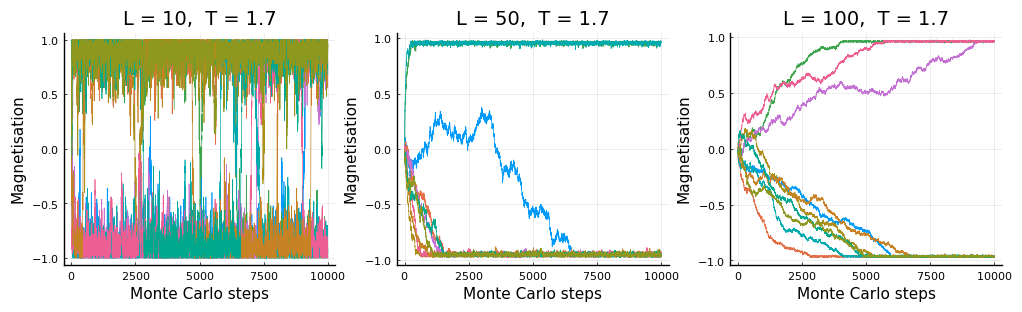

In [422]:
plot(trajectories,layout=(1,3),size = (1000,300),labels=false,linewidth=0.5,
    xlabel=["Monte Carlo steps" "Monte Carlo steps" "Monte Carlo steps"],
    ylabel=["Magnetisation" "Magnetisation" "Magnetisation"],
    title=["L = 10,  T = 1.7" "L = 50,  T = 1.7" "L = 100,  T = 1.7"],)
png("2single_trajectories")

 # Magnetization as a function of temperature  T ∈ [1, 3.5]

In [423]:
T = LinRange(1,3.5,12)         #temperatures
L = [10, 50, 100]              #sizes
K = 1000000                    #Monte Carlo steps;

In [424]:
# collecting magnetisation data

function magnetisation(K,L,T,J=1,kB=1,K0=10000)
    magnetisation_data=[]
    for l in L
        mag=[]
        for t in T
            m = spin_configuration(K,l,t)[2]
            m=m[K0:end]
            print(length(m))
            for i in 1:length(m)
                m[i]=abs(m[i])
            end
            push!(mag,mean(m))
        end
        push!(magnetisation_data,mag)
    end
    return magnetisation_data
end

mag = magnetisation(K,L,T)

990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001990001

3-element Vector{Any}:
 Any[0.9946334195622047, 0.9813474733863957, 0.9488014860591107, 0.8726221690685185, 0.7156727316437054, 0.522717431598554, 0.3771687503345958, 0.29198083638299366, 0.24074094874651655, 0.2083622137755418, 0.1866045387832943, 0.17058453476309637]
 Any[0.9986967415184329, 0.9944535021681786, 0.9833878503153034, 0.9585928644516521, 0.9019909208172514, 0.6853007380800625, 0.17593587642840763, 0.08765134742288139, 0.061734380470322765, 0.04990923685935671, 0.042965348115809994, 0.038410164838217346]
 Any[0.9990049333283488, 0.9955408919788971, 0.8876666981144471, 0.8910019153516008, 0.9201382148098841, 0.7811449820757757, 0.10972487098497881, 0.04602510260090646, 0.03189211990694958, 0.025587429911686957, 0.02183585935771782, 0.019469668212456354]

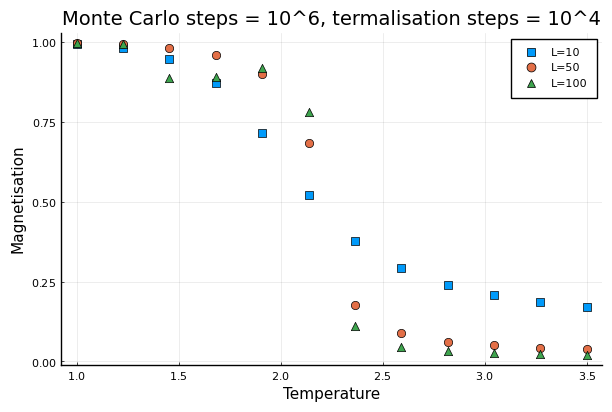

In [438]:
Plots.scatter(T,mag,markershape=[:square :circle :utriangle],
    markerstrokewidth=0.5,labels=["L=10" "L=50" "L=100"],markersize = 6,
    xlabel="Temperature",
    ylabel="Magnetisation",
    title = "Monte Carlo steps = 10^6, termalisation steps = 10^4")
png("3magnetisation")

# Magnetic susceptibility as a function of temperature T ∈ [1, 3.5]

In [454]:
T = LinRange(1,3.5,12)         #temperatures
L = [10, 50, 100]              #sizes
K = 1000000                    #Monte Carlo steps;

In [447]:
#collecting susceptibility data

function susceptibility(K,L,T,J=1,kB=1,K0=1)
    susceptibility_data=[]
    for l in L
        sus = []
        for t in T
            s = spin_configuration(K,l,t)[2]
            s = s[K0:end]
            s1 = []
            s2 = []
            for i in 1:length(s)
                push!(s1,s[i]^2)
                push!(s2,abs(s[i]))
            end
            s1 = mean(s1)
            s2 = mean(s2)^2
            chi = (l^2/(kB*t)) * (s1 - s2)   #susceptibility
            push!(sus, chi)
            println(length(sus))
        end
        push!(susceptibility_data,sus)
    end
    return susceptibility_data
end
sus = susceptibility(K,L,T)

susceptibility (generic function with 4 methods)

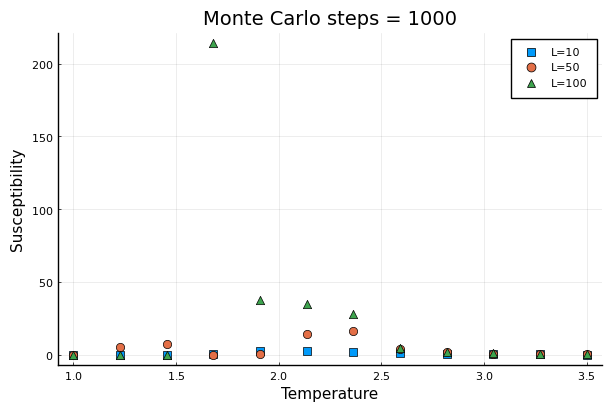

In [455]:
Plots.scatter(T,sus,markershape=[:square :circle :utriangle],markerstrokewidth=0.5,
    labels=["L=10" "L=50" "L=100"],markersize = 6,
    xlabel="Temperature",
    ylabel="Susceptibility",
    title = "Monte Carlo steps = 1000")
png("4susceptibilitybonus")

# .txt data

In [439]:
writedlm("data_heatmap.txt", new_plots)
writedlm("data_trajectories.txt", trajectories)
writedlm("data_magnetisation.txt", mag)
writedlm("data_susceptibility.txt", mag)